In [35]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import config

def load_data(file) -> DataFrame:
    # Load the data from the csv file
    return pd.read_csv(f"{config.csv_folder}/{file}", converters={'isodt': lambda x: pd.to_datetime(x.split('T')[0])}, dtype={'epochdt': 'int64'})

def rolling_avg(df: DataFrame, window: int) -> DataFrame:
    # Calculate the rolling average
    return df.rolling(window=window, on='isodt').mean()

def compare_uvi(*cities) -> None:
    # Create a new figure with a specific size (width, height)
    plt.figure(figsize=(12, 8))

    for city in cities:
        df = load_data(f"uvi_{city}.csv")
        df = rolling_avg(df, 7)

        # Plot the data
        plt.plot(df['isodt'].to_numpy(), df['uvi'].to_numpy(), label=city)        

        # Annotate each point with its value
        # for x, y in zip(df['isodt'].to_numpy(), df['uvi'].to_numpy()):
        #     plt.gca().annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    # Create a DateFormatter for the x-axis
    ax = plt.gca()
    day_locator = mdates.DayLocator(interval=7)
    ax.xaxis.set_major_locator(day_locator)

    # Add grid lines
    ax.grid(True)

    # Customize the legend
    legend = ax.legend(frameon=True, framealpha=1, shadow=True, borderpad=1)

    # Rotate date labels automatically
    plt.gcf().autofmt_xdate()

    # Add a title
    plt.title('UVI index')

    plt.show()


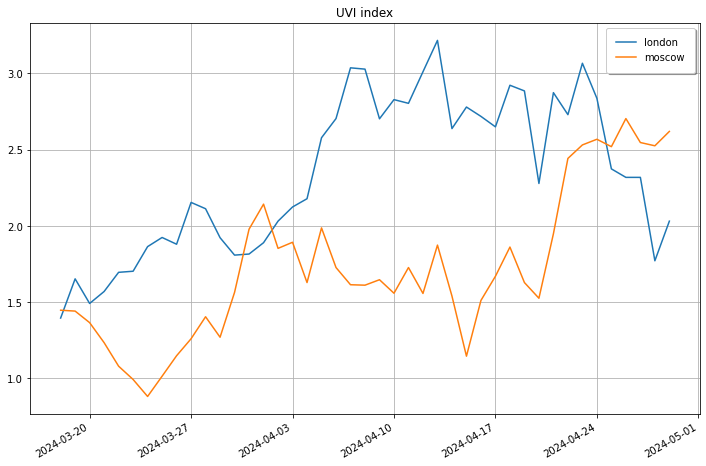

In [41]:


compare_uvi('london','moscow')